In [36]:
from top2vec import Top2Vec
import pandas as pd
import matplotlib.pyplot as plt
import umap

In [2]:
df=pd.read_csv("rpaper.csv",index_col=0)

C:\Users\akshe\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,5,6,7,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
abstract=list(df.abstract.unique())
abstract=[str(i) for i in abstract]

In [4]:
model=Top2Vec(abstract,speed="learn",workers=10,verbose=True)


2020-09-30 15:44:48,642 - top2vec - INFO - Pre-processing documents for training
2020-09-30 15:46:35,853 - top2vec - INFO - Creating joint document/word embedding
2020-09-30 17:03:25,157 - top2vec - INFO - Creating lower dimension embedding of documents
2020-09-30 17:06:38,759 - top2vec - INFO - Finding dense areas of documents
2020-09-30 17:06:55,250 - top2vec - INFO - Finding topics


In [37]:
model.save("review-paper")

In [15]:
model.get_num_topics()

776

In [19]:
model.search_topics(["depression"],num_topics=10)

([array(['psychological', 'anxiety', 'depression', 'mental', 'coping',
         'depressive', 'emotional', 'insomnia', 'anxious', 'fear', 'phq',
         'perceived', 'stressful', 'worries', 'stress', 'worry',
         'resilience', 'anger', 'burnout', 'feelings', 'loneliness', 'mood',
         'neuroticism', 'hopelessness', 'gad', 'stressors', 'psychosocial',
         'somatization', 'frontline', 'psychologically', 'job', 'self',
         'wellbeing', 'unmarried', 'moderated', 'married', 'posttraumatic',
         'ptsd', 'marital', 'feeling', 'friends', 'distress', 'sleep',
         'personality', 'disorder', 'psychiatric', 'behaviors', 'nurses',
         'suicidal', 'ghq'], dtype='<U15'),
  array(['psychological', 'depression', 'mental', 'anxiety', 'insomnia',
         'depressive', 'meta', 'appraisal', 'posttraumatic',
         'methodological', 'emotional', 'narratively', 'mood',
         'psychiatric', 'frontline', 'bias', 'disorder', 'anger', 'fear',
         'worries', 'coping',

Enter the word to search similar topics without spaces: Neural


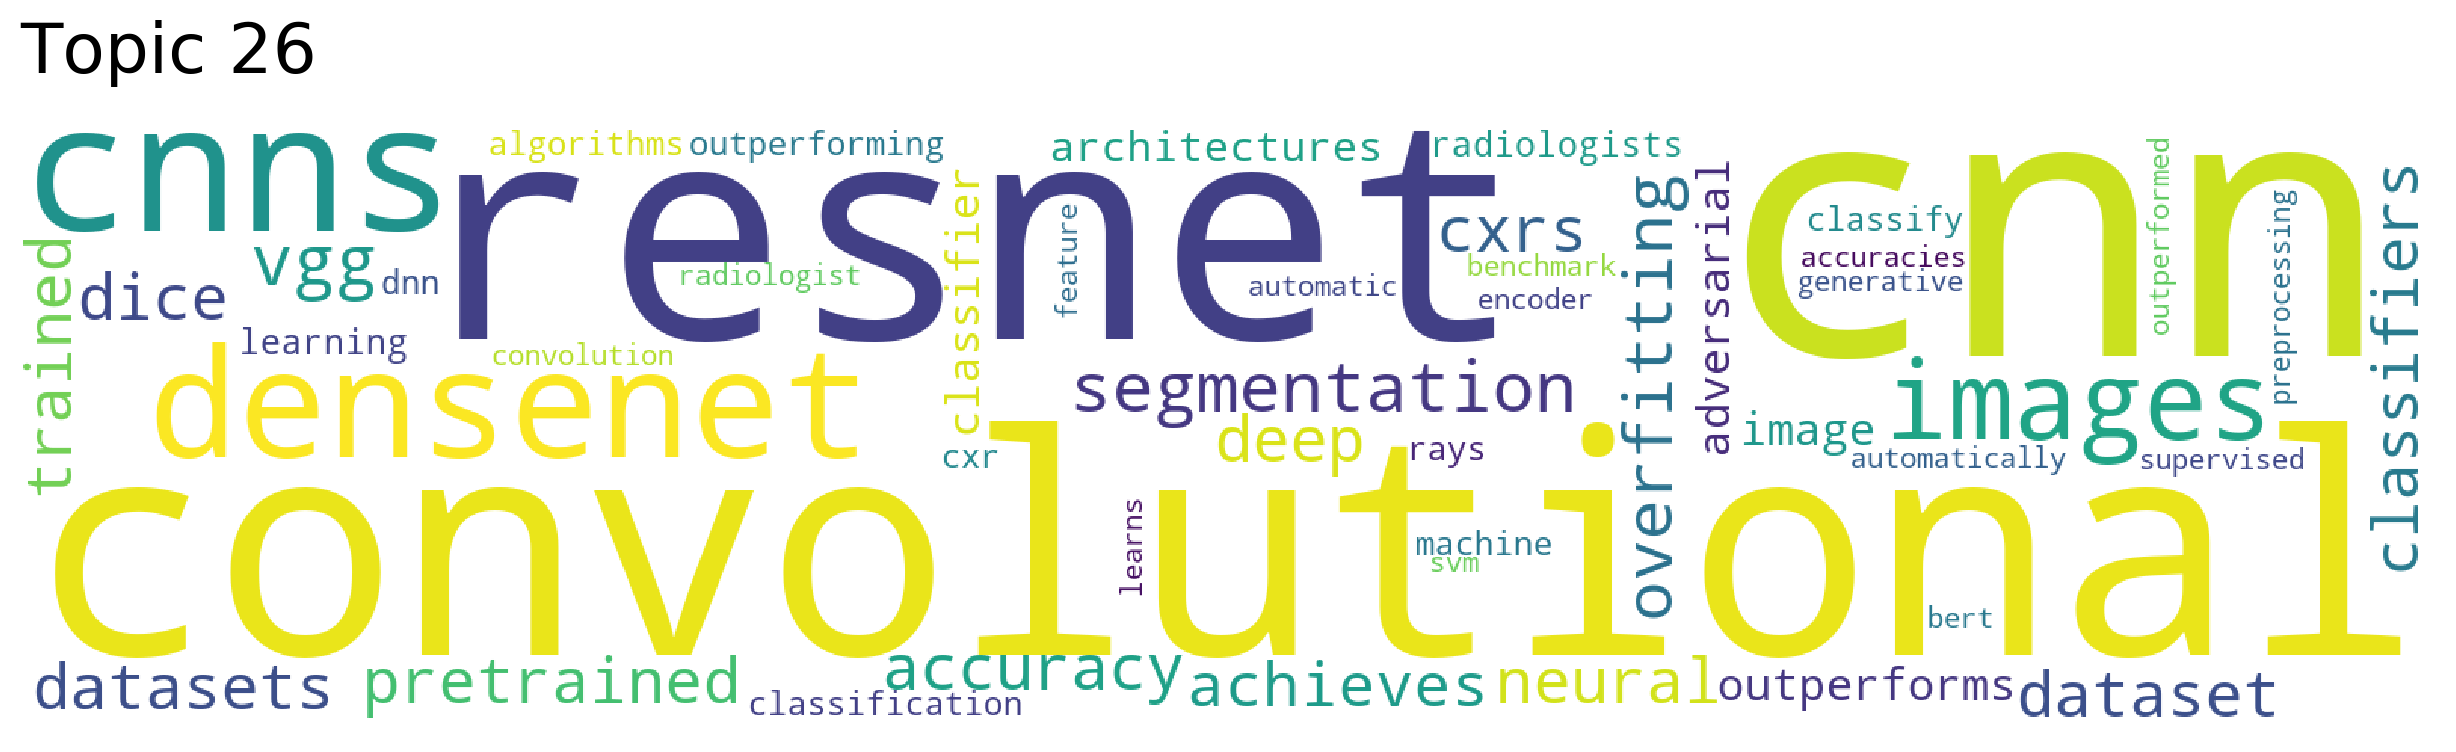

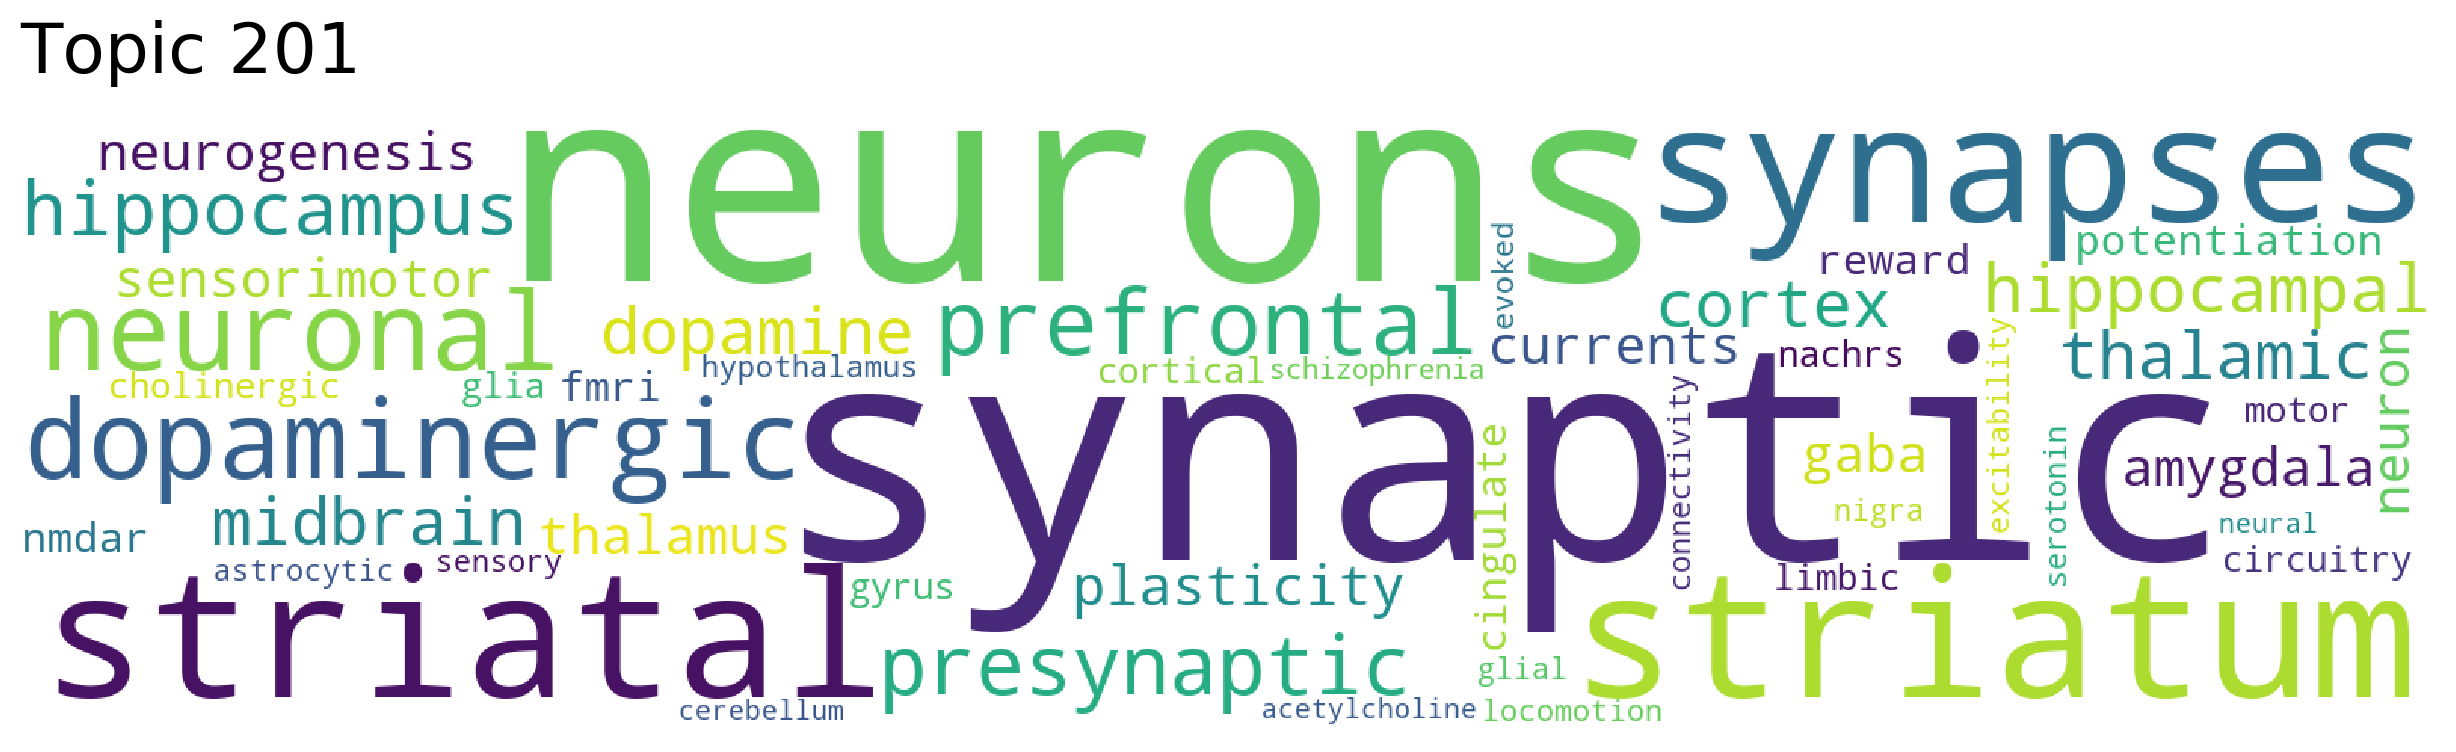

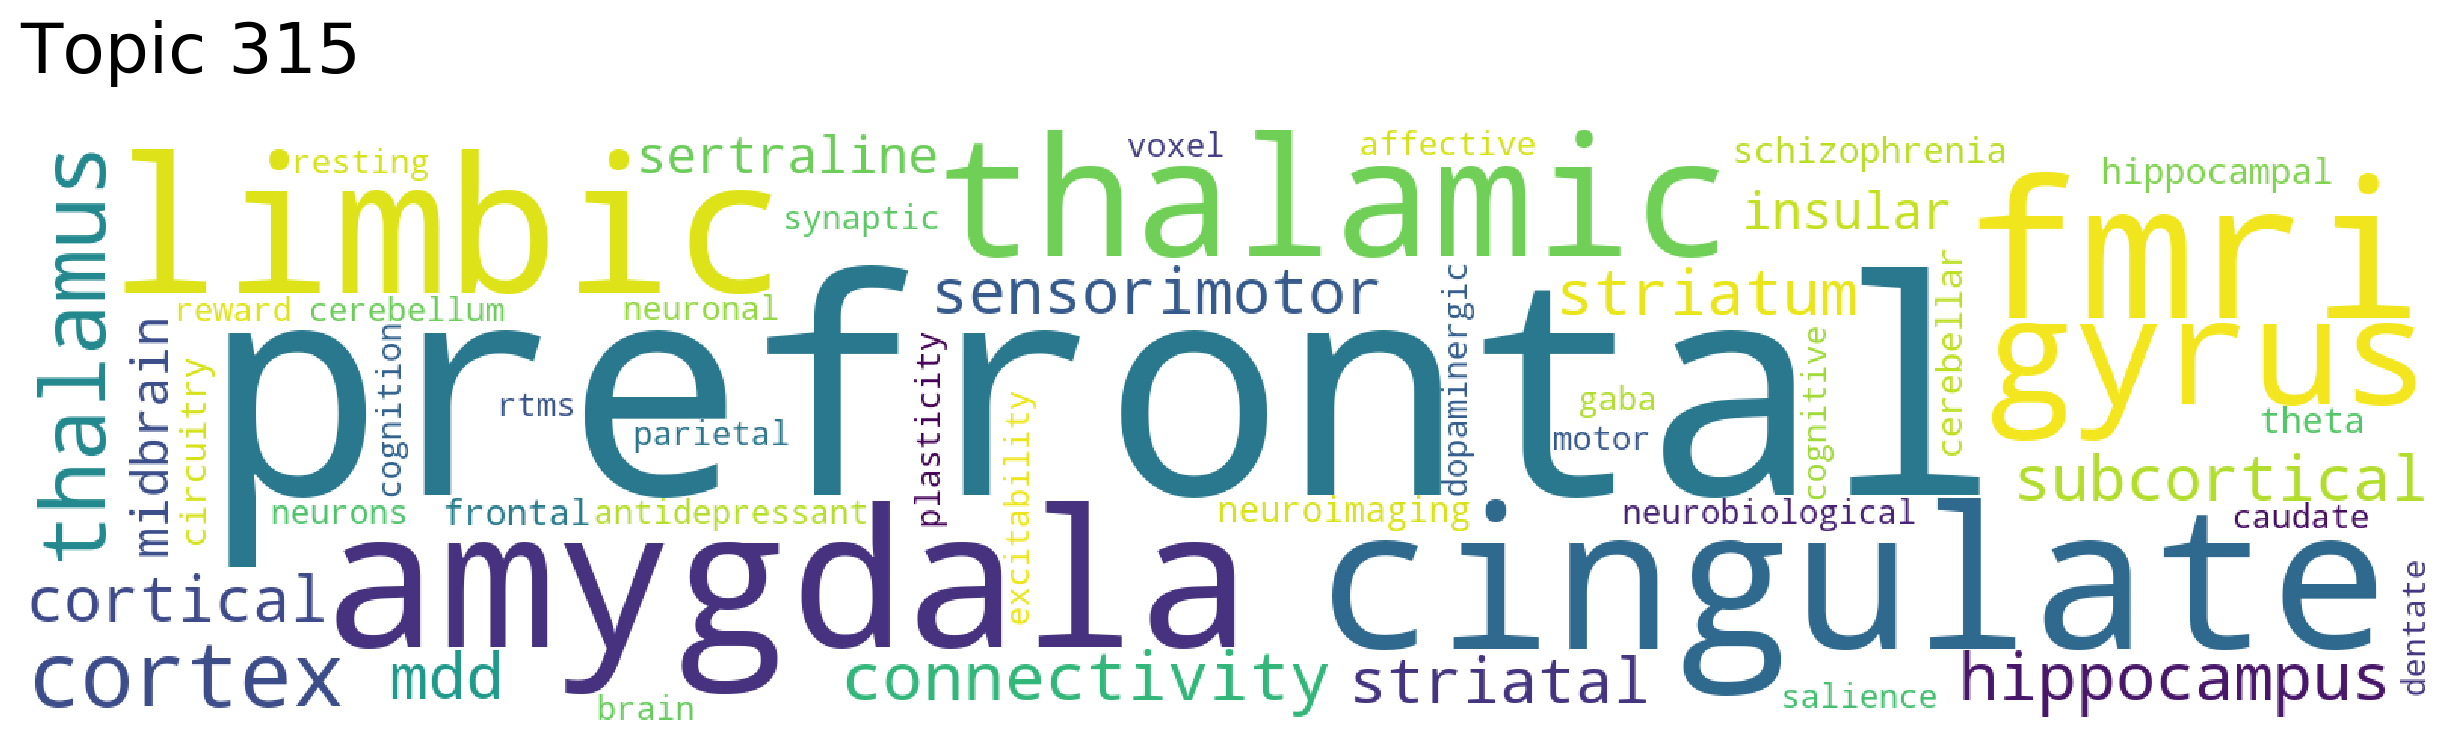

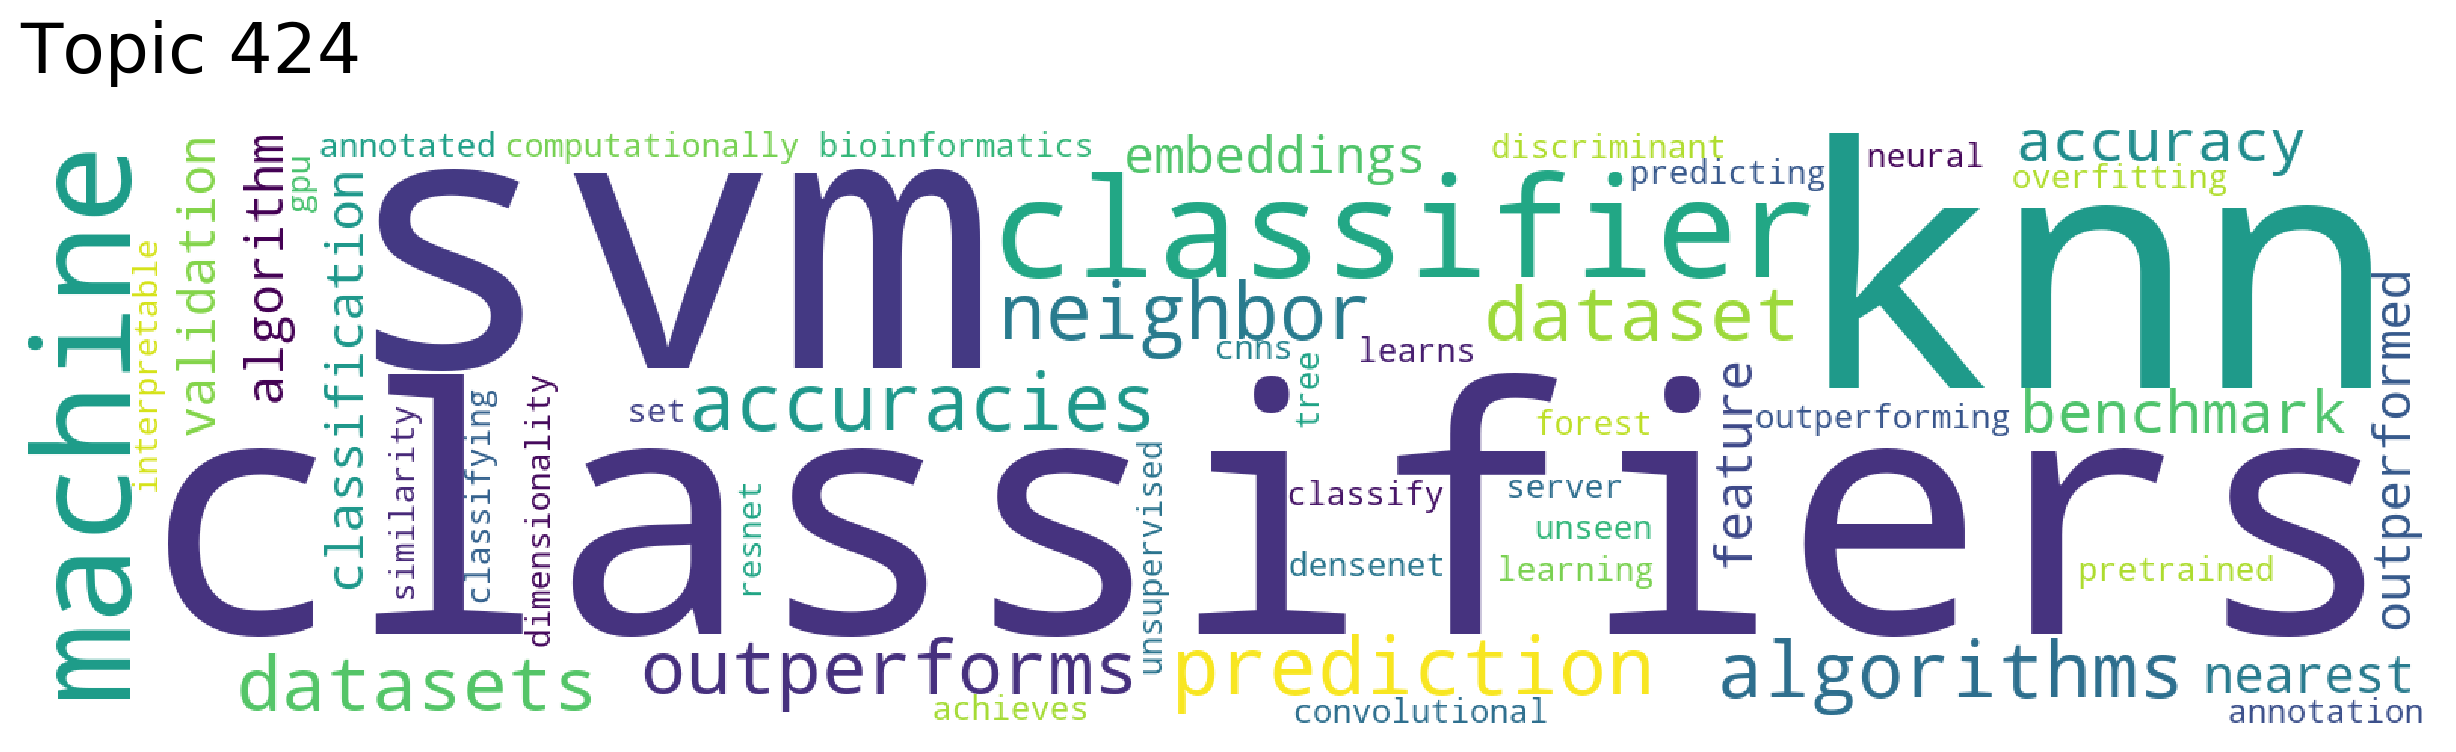

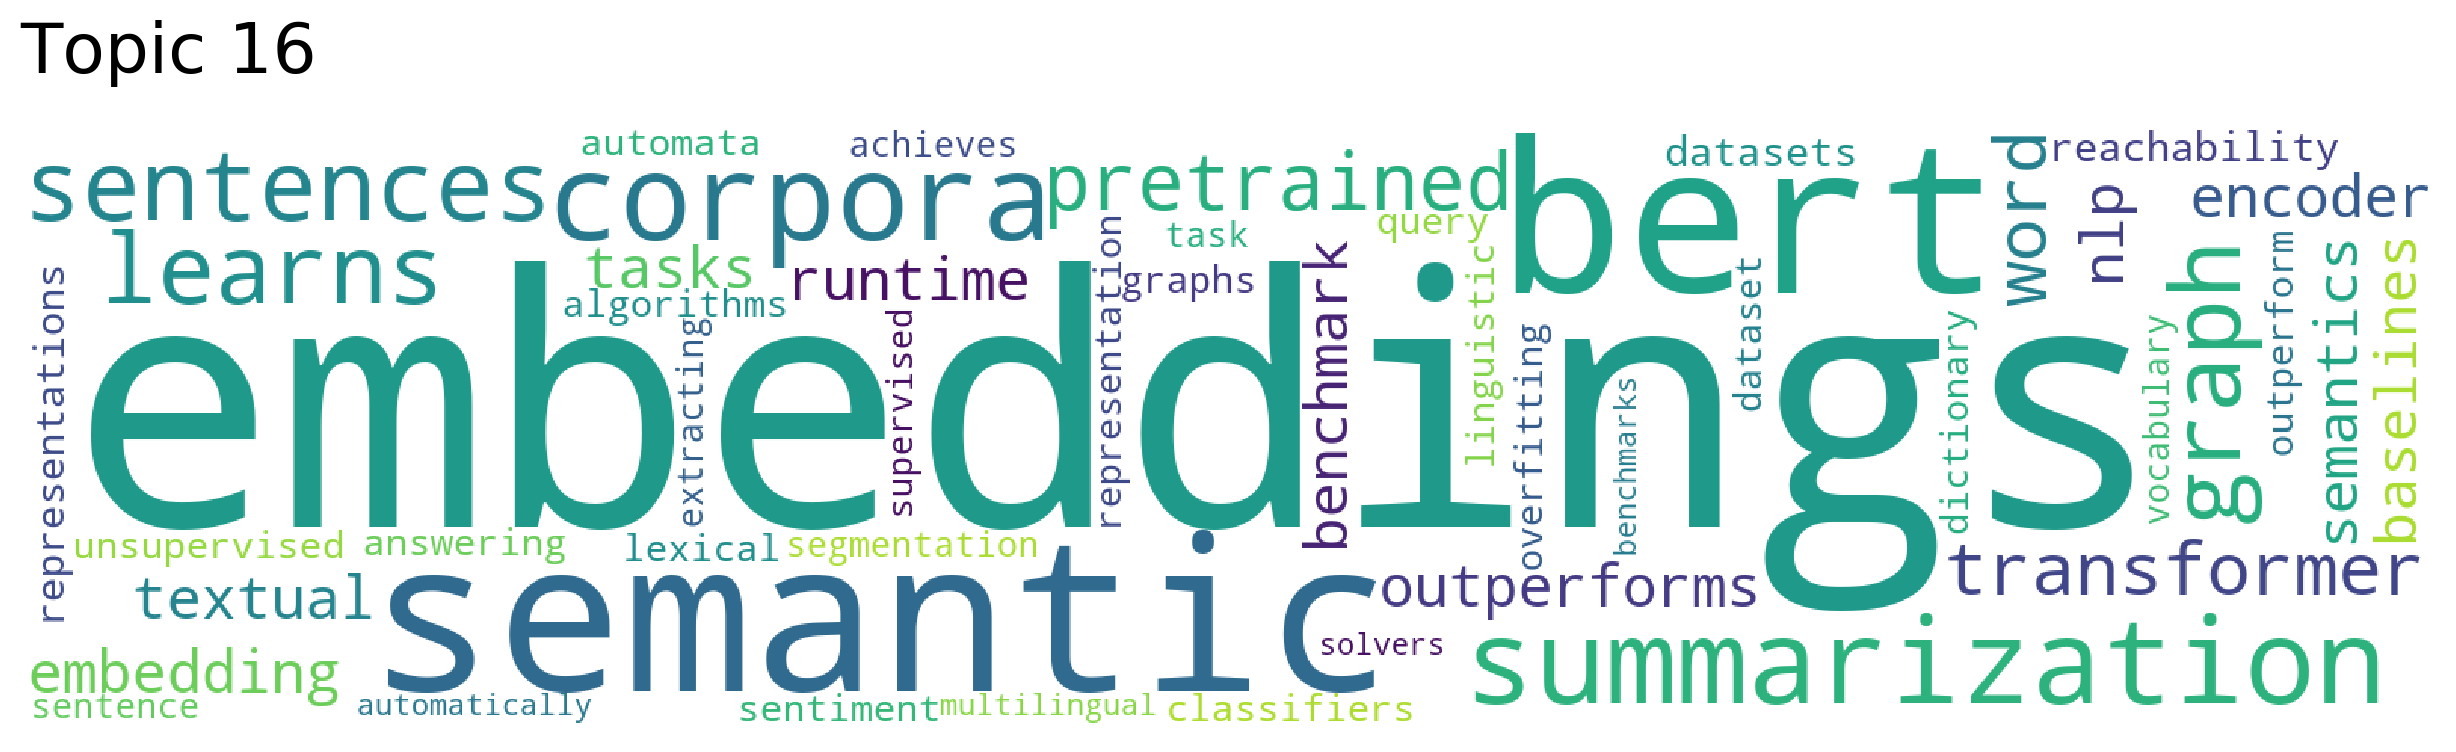

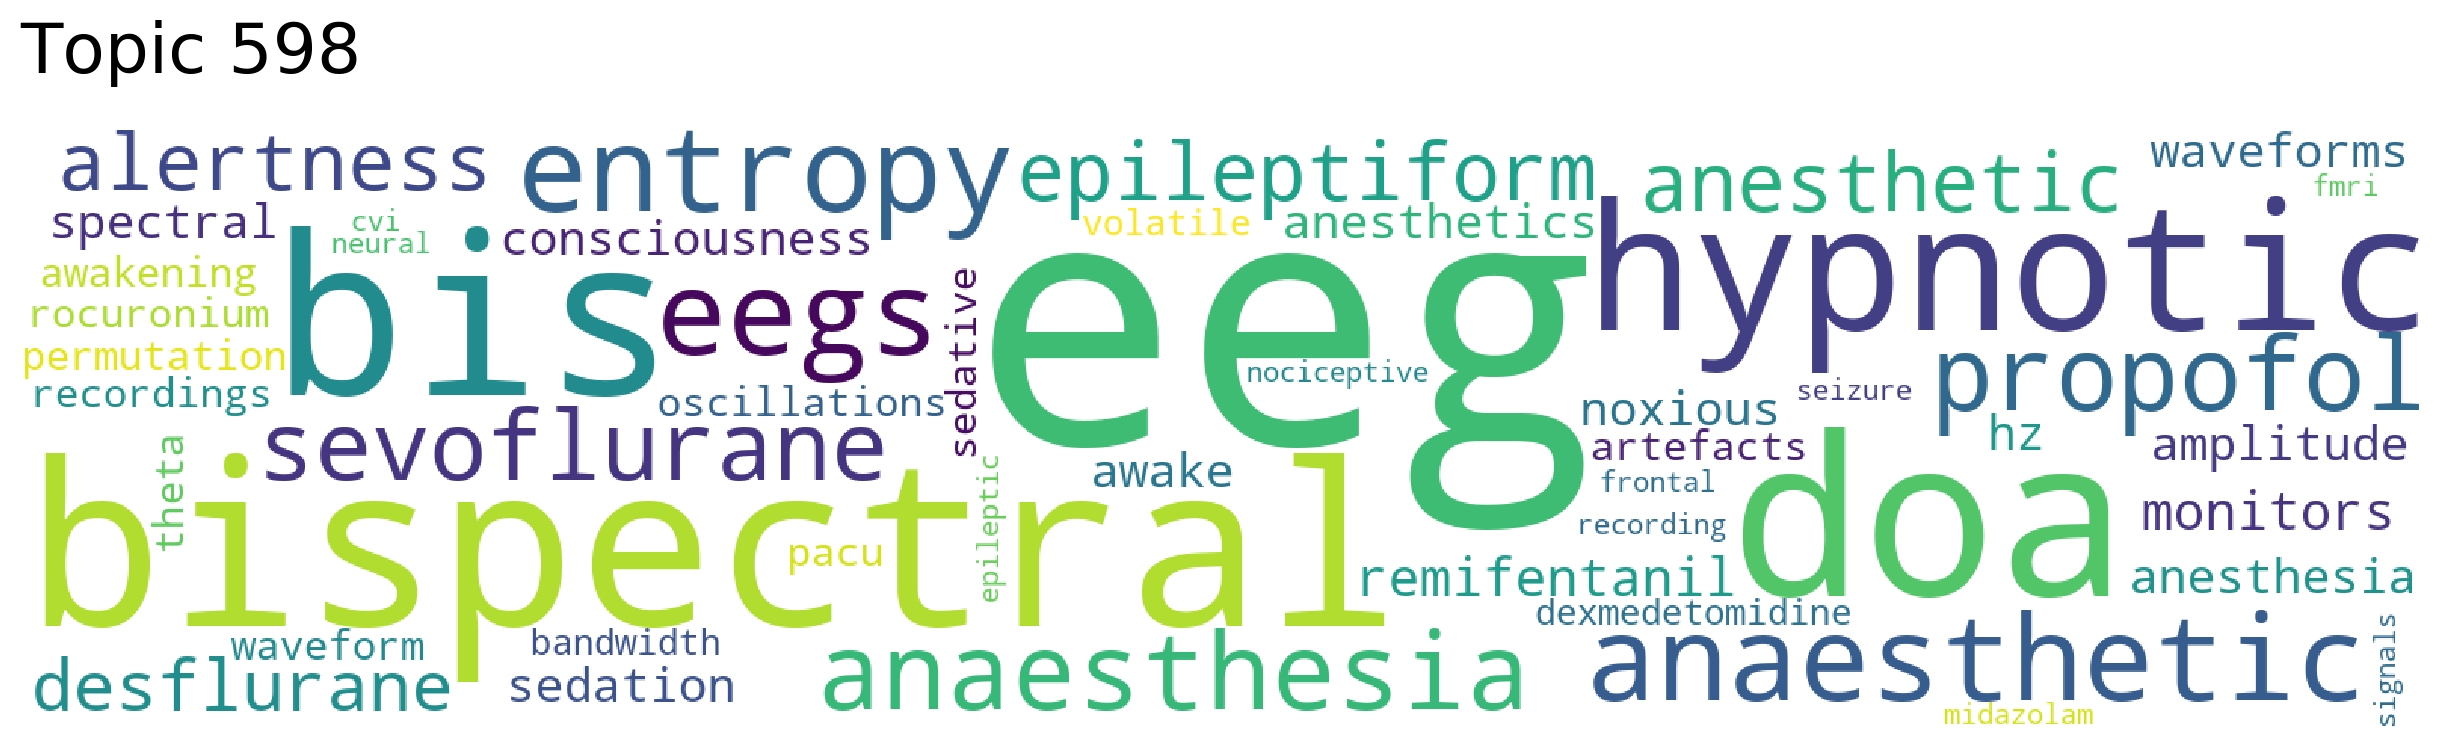

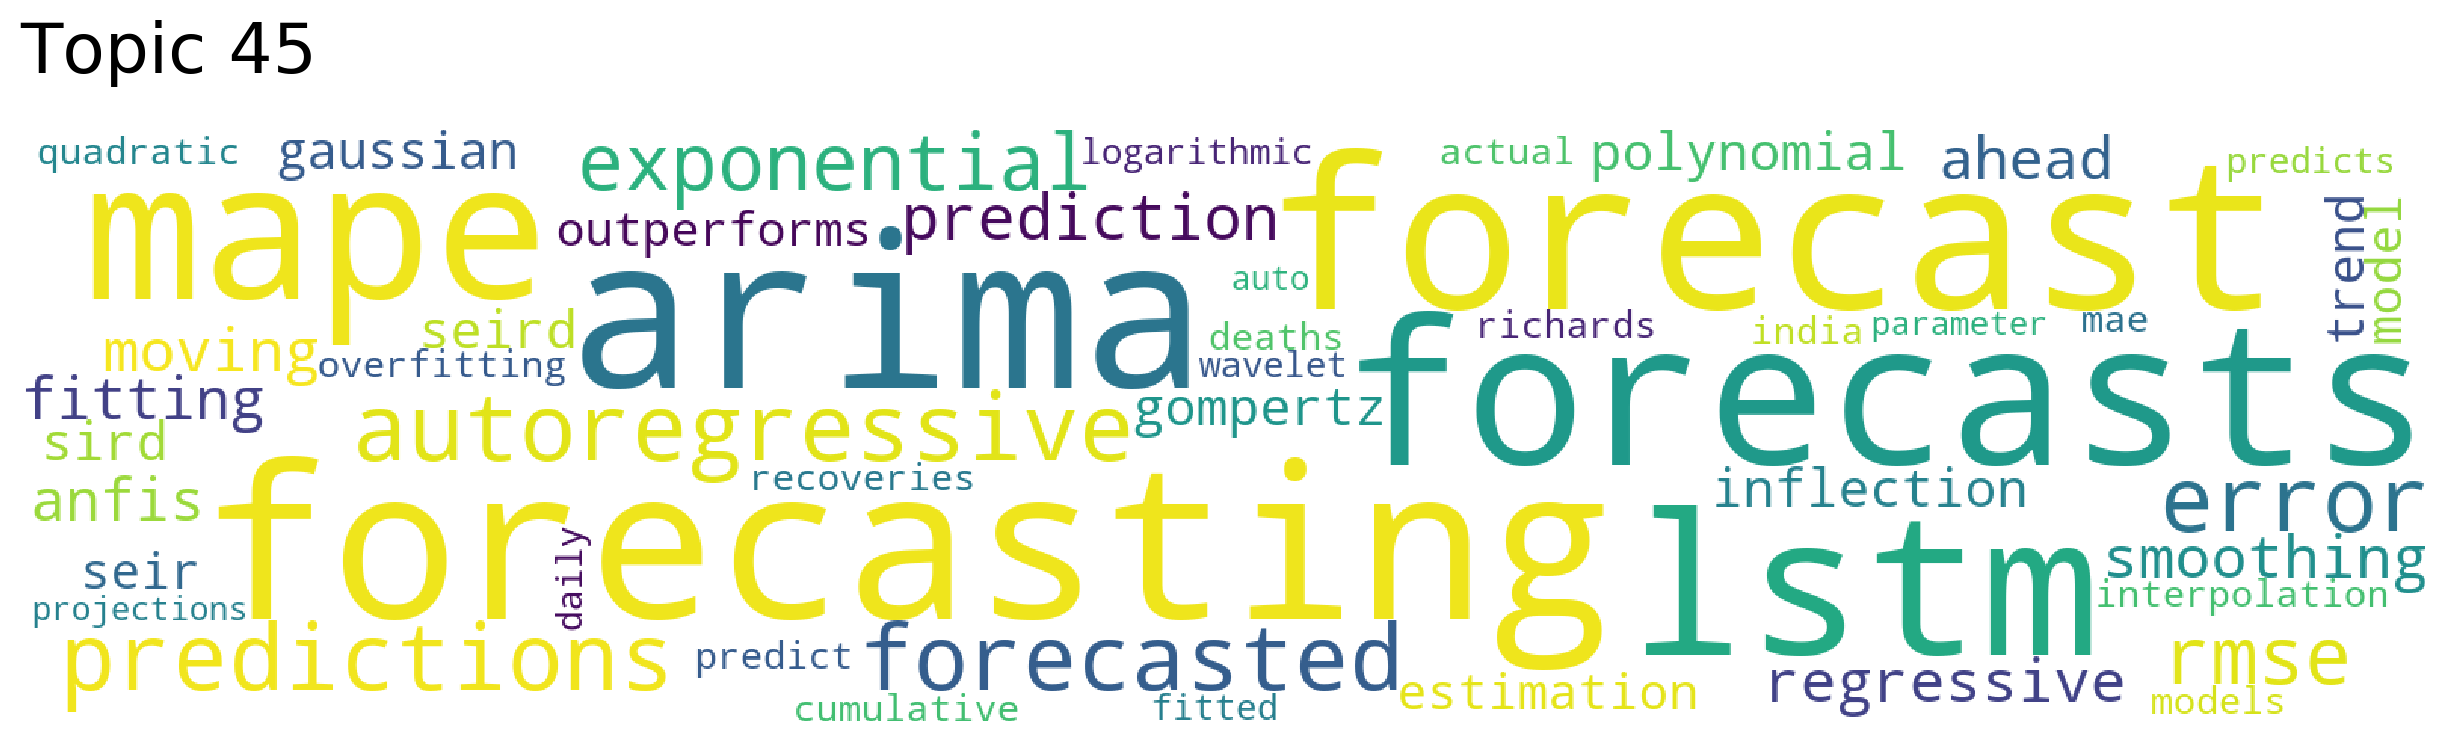

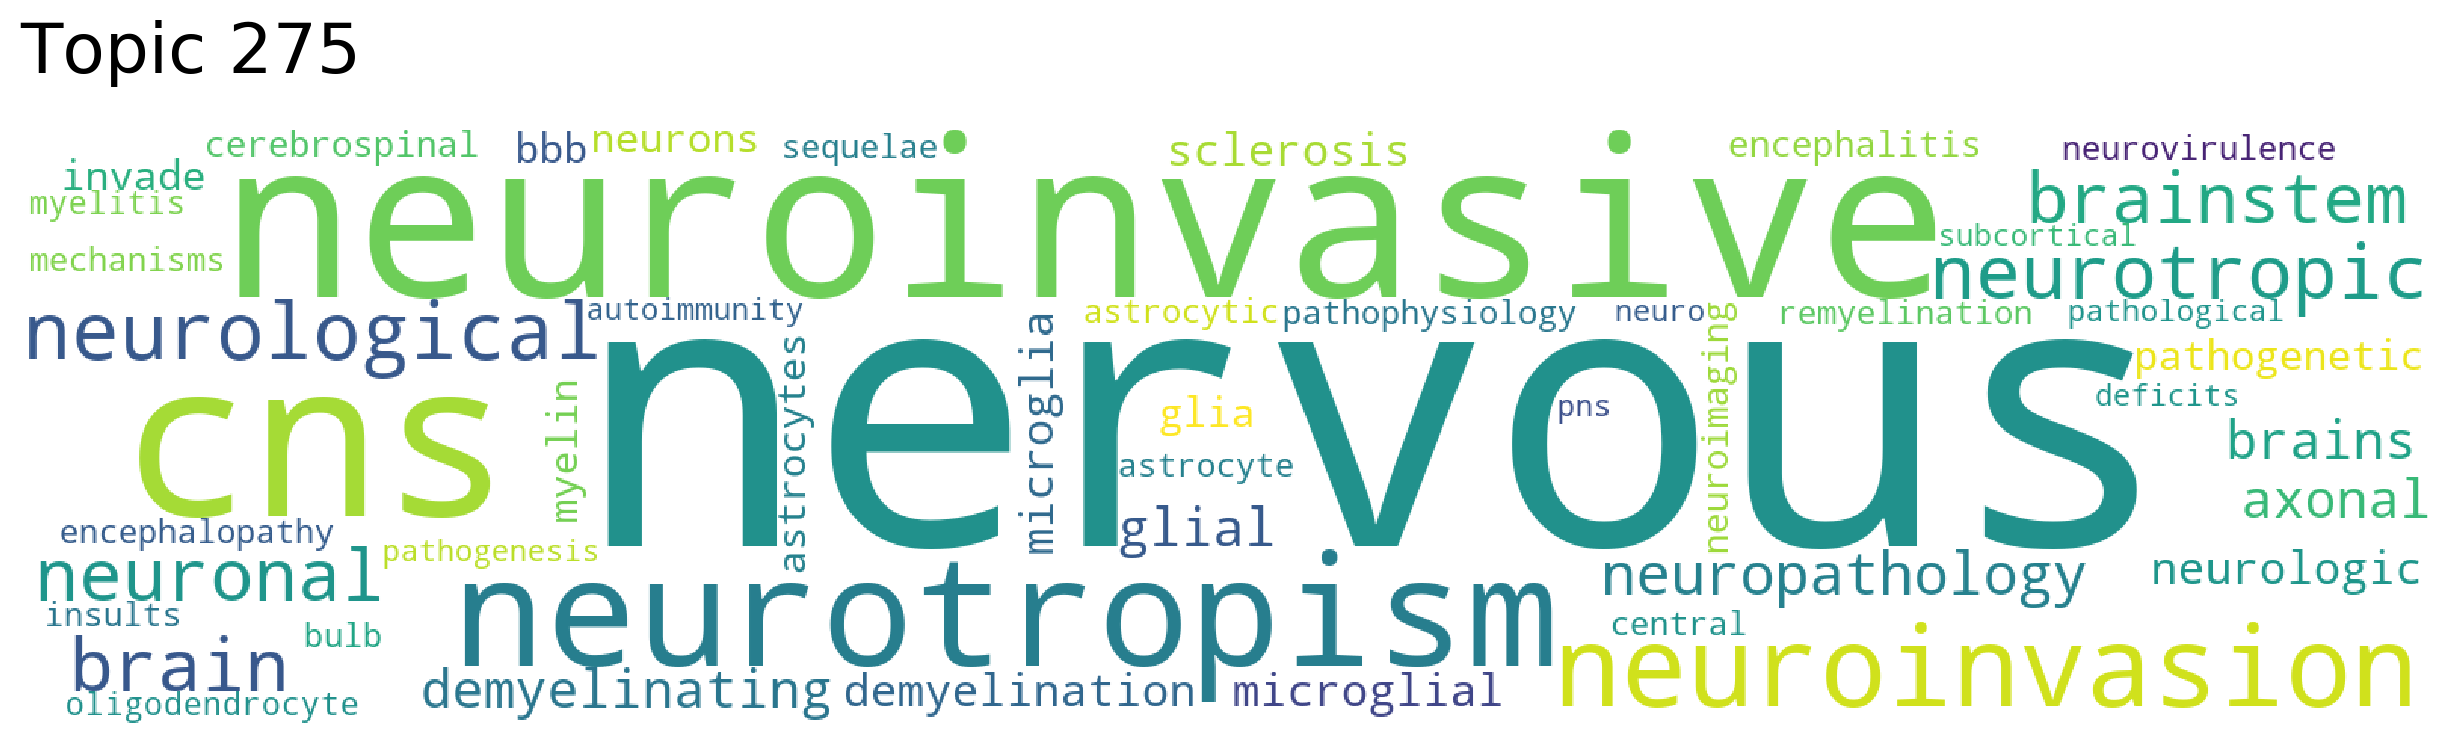

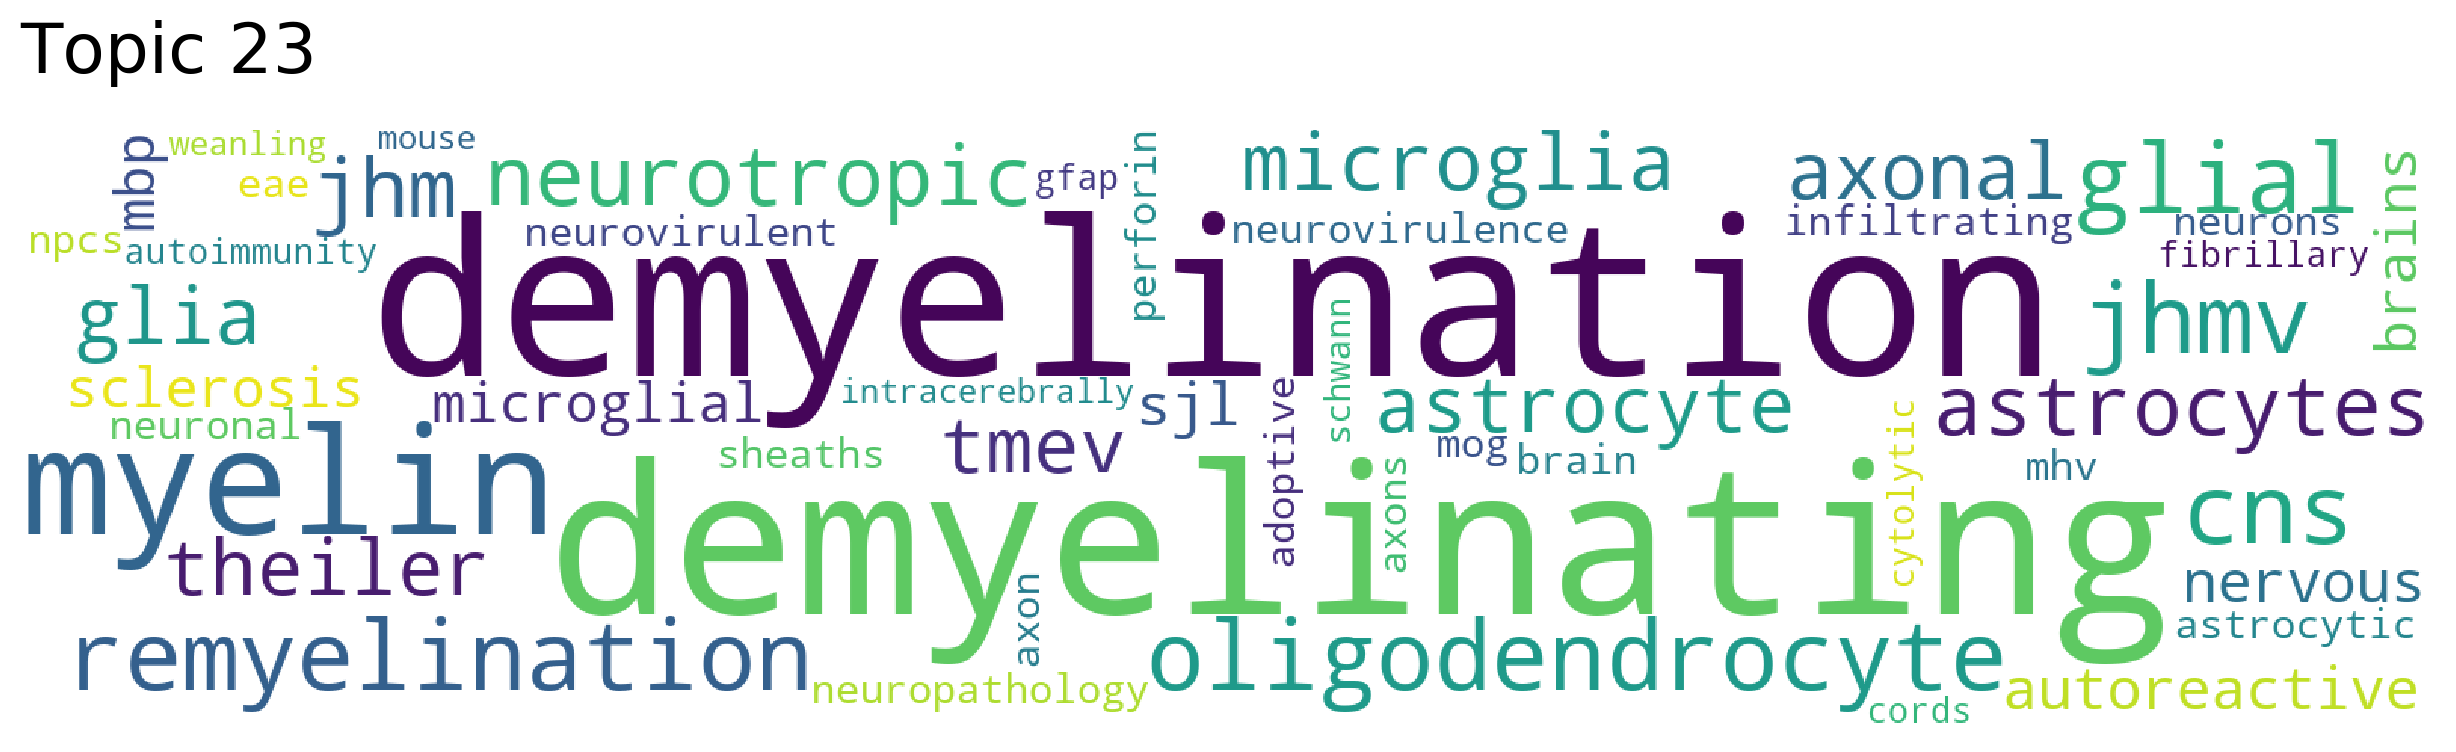

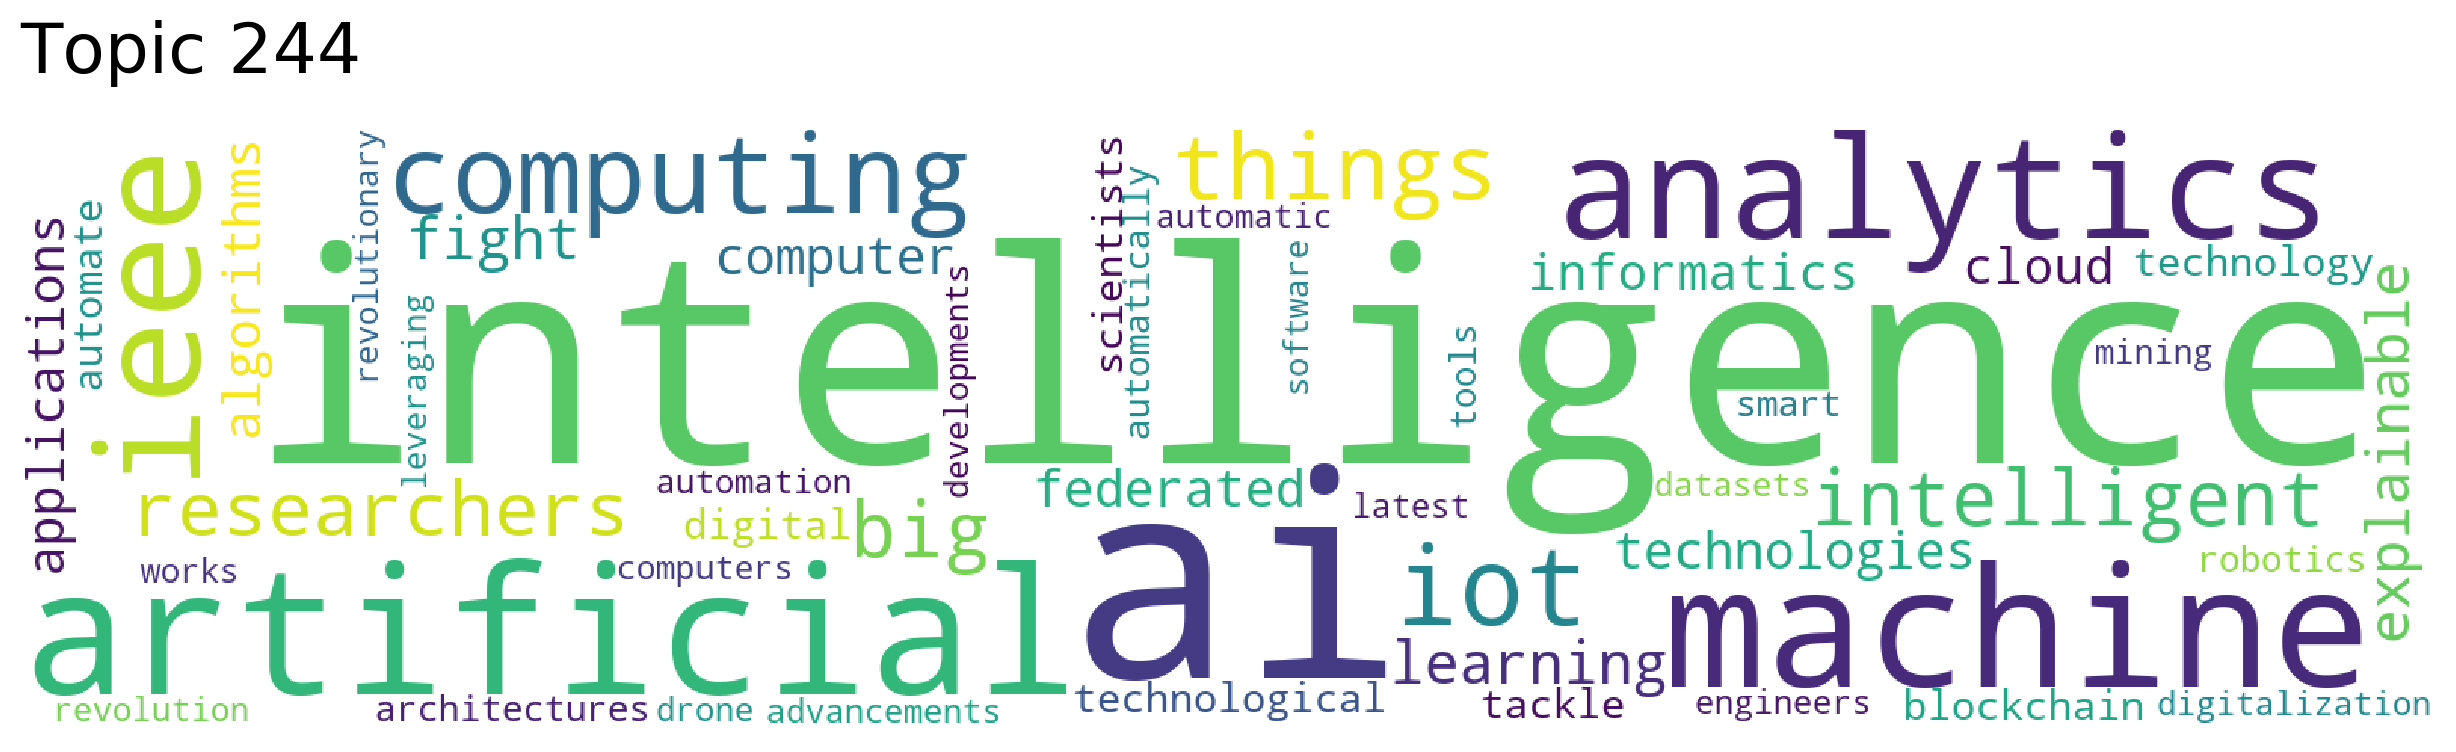

In [20]:
key=str(input("Enter the word to search similar topics without spaces:"))
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=[key], num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic,background_color="white")

In [22]:
len(model.doc_top)

177711

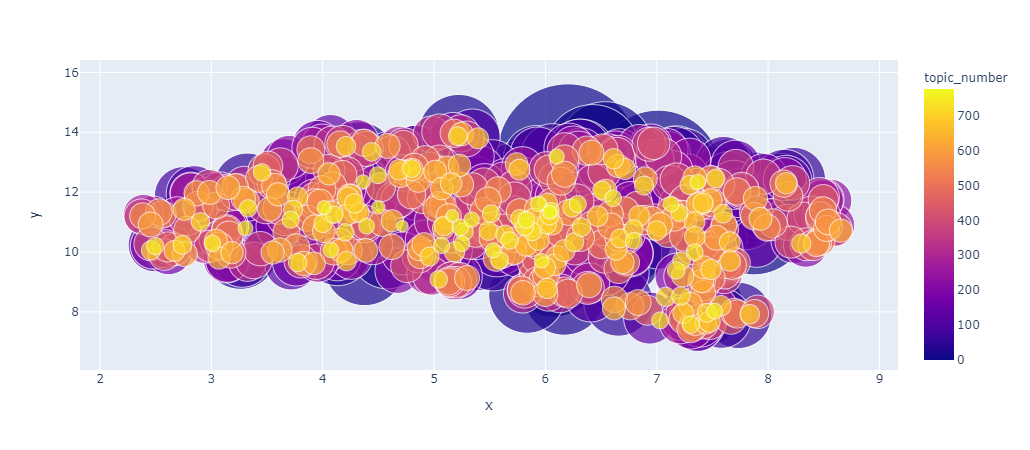

In [29]:
standard_embedding = umap.UMAP(n_neighbors=15).fit_transform(model.topic_vectors)
import plotly.express as px
import numpy as np
topic_words=[str(" ".join(i[:15])) for i in model.get_topics()[0]]
df =pd.DataFrame(data=np.array([standard_embedding[:, 0], standard_embedding[:, 1],model.get_topic_sizes()[0],model.get_topic_sizes()[1]]).transpose()) 
df.columns=["x","y","number_of_PAPERS_in_topic","topic_number"]
fig = px.scatter(df, x="x", y="y",size_max=100,size="number_of_PAPERS_in_topic",color="topic_number",hover_name=topic_words)
fig.show()

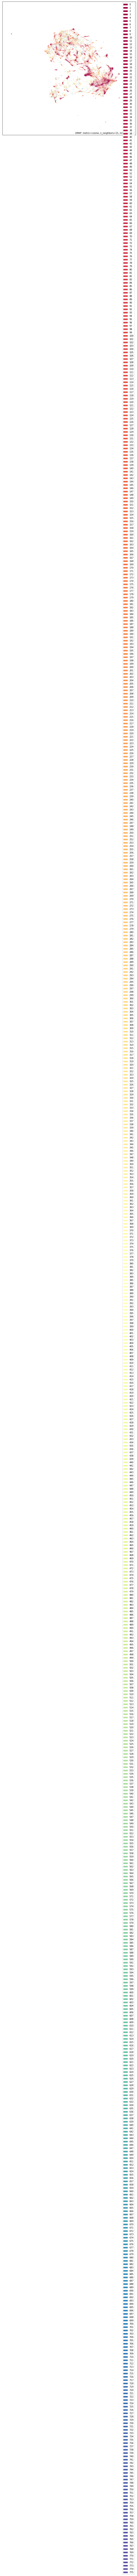

In [38]:
import umap.plot
umap_model = umap.UMAP(n_neighbors=15,n_components=2,metric='cosine').fit(model.model.docvecs.vectors_docs)
umap.plot.points(umap_model,model.doc_top,)